# Regression Models in R (BikeSharing -Kaggle)

In [1]:
library(readr)
library(mechkar)
library(dplyr)
library(ggplot2)

Warning message:
"package 'readr' was built under R version 4.0.2"
Warning message:
"package 'dplyr' was built under R version 4.0.2"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'ggplot2' was built under R version 4.0.2"


In [2]:
df_train <- read.csv("C:/Users/Xnes/DataScience/ML/kaggle challenge/train.csv")
df_test <- read.csv("C:/Users/Xnes/DataScience/ML/kaggle challenge/test.csv")

In [3]:
head(df_train)
dim(df_train)

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,985
2,2,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,801
3,3,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,1349
4,4,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,1562
5,5,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,1600
6,6,1,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,1606


[1] 365  12

# EDA

In [4]:
summary(df_train)

       id          season           mnth           holiday      
 Min.   :  1   Min.   :1.000   Min.   : 1.000   Min.   :0.0000  
 1st Qu.: 92   1st Qu.:2.000   1st Qu.: 4.000   1st Qu.:0.0000  
 Median :183   Median :3.000   Median : 7.000   Median :0.0000  
 Mean   :183   Mean   :2.499   Mean   : 6.526   Mean   :0.0274  
 3rd Qu.:274   3rd Qu.:3.000   3rd Qu.:10.000   3rd Qu.:0.0000  
 Max.   :365   Max.   :4.000   Max.   :12.000   Max.   :1.0000  
    weekday        workingday       weathersit         temp        
 Min.   :0.000   Min.   :0.0000   Min.   :1.000   Min.   :0.05913  
 1st Qu.:1.000   1st Qu.:0.0000   1st Qu.:1.000   1st Qu.:0.32500  
 Median :3.000   Median :1.0000   Median :1.000   Median :0.47917  
 Mean   :3.008   Mean   :0.6849   Mean   :1.422   Mean   :0.48666  
 3rd Qu.:5.000   3rd Qu.:1.0000   3rd Qu.:2.000   3rd Qu.:0.65667  
 Max.   :6.000   Max.   :1.0000   Max.   :3.000   Max.   :0.84917  
     atemp              hum           windspeed            cnt      


In [5]:
df_train$season <- factor(df_train$season)
df_train$mnth <- factor(df_train$mnth)
df_train$holiday <- factor(df_train$holiday)
df_train$weekday <- factor(df_train$weekday)
df_train$weathersit <- factor(df_train$weathersit)
df_train$workingday <- factor(df_train$workingday)

In [6]:
df_test$season <- factor(df_test$season)
df_test$mnth <- factor(df_test$mnth)
df_test$holiday <- factor(df_test$holiday)
df_test$weekday <- factor(df_test$weekday)
df_test$weathersit <- factor(df_test$weathersit)
df_test$workingday <- factor(df_test$workingday)

In [4]:
df_train$ratiotemp<-df_train$atemp/df_train$temp
df_test$ratiotemp<-df_test$atemp/df_test$temp

In [8]:
summary(df_test)

       id        season      mnth     holiday weekday workingday weathersit
 Min.   :366.0   1:91   1      : 31   0:355   0:53    0:116      1:237     
 1st Qu.:457.2   2:92   3      : 31   1: 11   1:53    1:250      2:123     
 Median :548.5   3:94   5      : 31           2:52               3:  6     
 Mean   :548.5   4:89   7      : 31           3:52                         
 3rd Qu.:639.8          8      : 31           4:52                         
 Max.   :731.0          10     : 31           5:52                         
                        (Other):180           6:52                         
      temp            atemp             hum           windspeed      
 Min.   :0.1075   Min.   :0.1017   Min.   :0.2542   Min.   :0.04665  
 1st Qu.:0.3477   1st Qu.:0.3507   1st Qu.:0.5081   1st Qu.:0.13372  
 Median :0.5142   Median :0.4978   Median :0.6119   Median :0.17475  
 Mean   :0.5041   Mean   :0.4819   Mean   :0.6122   Mean   :0.18957  
 3rd Qu.:0.6540   3rd Qu.:0.6076   3rd Qu.

In [9]:
summary(df_train)

       id      season      mnth     holiday weekday workingday weathersit
 Min.   :  1   1:90   1      : 31   0:355   0:52    0:115      1:226     
 1st Qu.: 92   2:92   3      : 31   1: 10   1:52    1:250      2:124     
 Median :183   3:94   5      : 31           2:52               3: 15     
 Mean   :183   4:89   7      : 31           3:52                         
 3rd Qu.:274          8      : 31           4:52                         
 Max.   :365          10     : 31           5:52                         
                      (Other):179           6:53                         
      temp             atemp              hum           windspeed      
 Min.   :0.05913   Min.   :0.07907   Min.   :0.0000   Min.   :0.02239  
 1st Qu.:0.32500   1st Qu.:0.32195   1st Qu.:0.5383   1st Qu.:0.13558  
 Median :0.47917   Median :0.47285   Median :0.6475   Median :0.18690  
 Mean   :0.48666   Mean   :0.46684   Mean   :0.6437   Mean   :0.19140  
 3rd Qu.:0.65667   3rd Qu.:0.61238   3rd Qu.:0.7

### Cluster analysis

In [5]:
library(Hmisc)
library(NbClust)
library(clusteval)
library(mclust)
library(fpc)
library(dbscan)

Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: 'Hmisc'


The following objects are masked from 'package:dplyr':

    src, summarize


The following objects are masked from 'package:base':

    format.pval, units


Package 'mclust' version 5.4.6
Type 'citation("mclust")' for citing this R package in publications.

Warning message:
"package 'dbscan' was built under R version 4.0.2"

Attaching package: 'dbscan'


The following object is masked from 'package:fpc':

    dbscan




In [6]:
plotElbow <- function(data, kmax=8) {
    # Compute and plot wss for k = 2 to kmax
    set.seed(123)
    wss <- sapply(1:kmax, 
              function(k){kmeans(data, k, nstart=50,iter.max = 15 )$tot.withinss})
    wss
    plot(1:k.max, wss,
         type="b", pch = 19, frame = FALSE, 
         xlab="Number of clusters K",
         ylab="Total within-clusters sum of squares")    
}

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


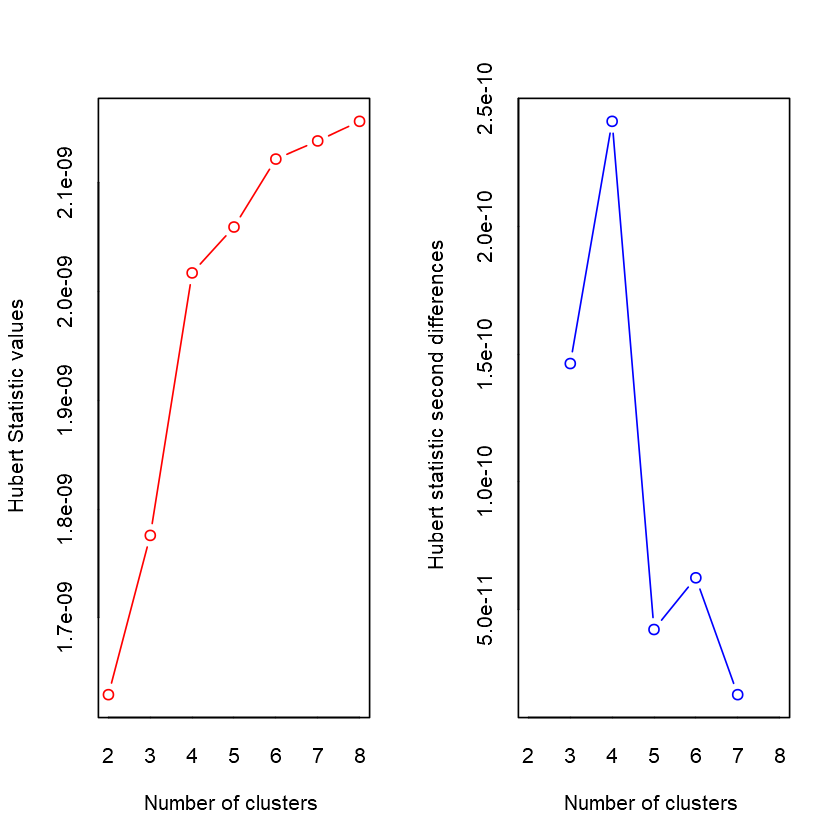

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 9 proposed 2 as the best number of clusters 
* 4 proposed 3 as the best number of clusters 
* 1 proposed 4 as the best number of clusters 
* 5 proposed 5 as the best number of clusters 
* 1 proposed 7 as the best number of clusters 
* 1 proposed 8 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
******************************************************************* 


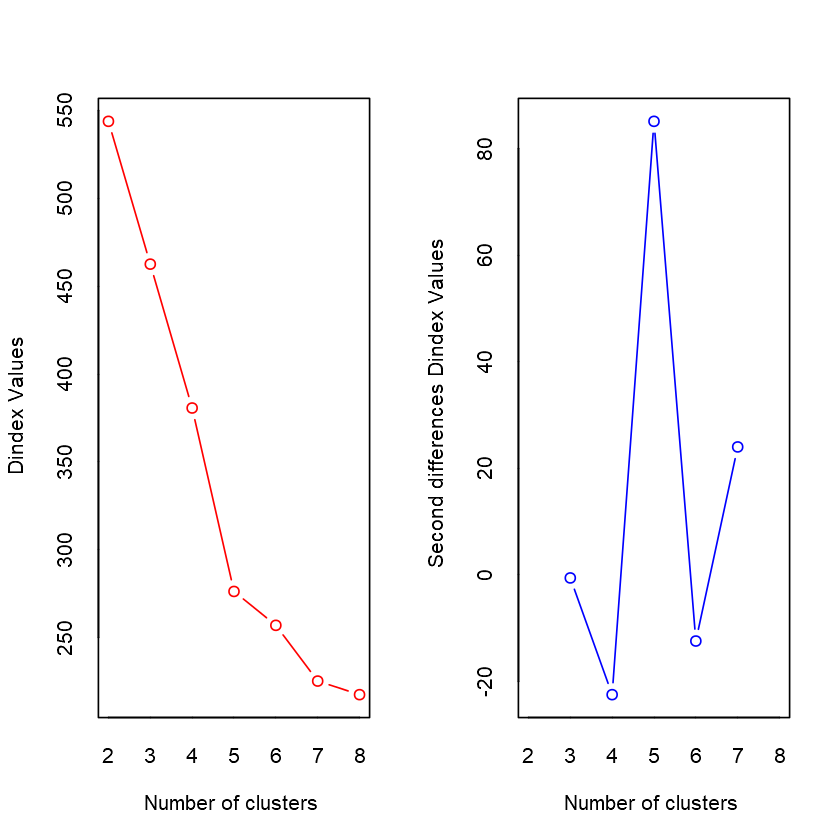

In [7]:
res <- NbClust(df_train, distance = "euclidean", min.nc=2, max.nc=8, method = "complete")

In [8]:
kmod <- kmeans(as.matrix(df_train[,2:13]),centers=2)

table(kmod$cluster)
kmod$centers
kmod$tot.withinss


  1   2 
224 141 

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,ratiotemp
1,2.977679,7.700893,0.02678571,2.937500,0.6919643,1.294643,0.5919444,0.5617213,0.6478031,0.1747495,4372.504,0.9561339
2,1.737589,4.659574,0.02836879,3.120567,0.6737589,1.624113,0.3194125,0.3160945,0.6370903,0.2178587,1869.943,1.0014084


[1] 150024977

In [9]:
df_train$kmod<-kmod$cluster

In [10]:
kmod <- kmeans(as.matrix(df_test[,2:12]),centers=2)

table(kmod$cluster)
kmod$centers
kmod$tot.withinss


  1   2 
182 184 

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,ratiotemp
1,1.615385,3.500000,0.02747253,3.000000,0.6868132,1.335165,0.4665279,0.4497887,0.5840096,0.2059186,0.9720128
2,3.364130,9.494565,0.03260870,2.972826,0.6793478,1.402174,0.5412255,0.5135670,0.6400173,0.1734037,0.9597548


[1] 2927.602

In [11]:
df_test$kmod<-kmod$cluster

In [12]:
head(df_train)

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,ratiotemp,kmod
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>
1,1,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,985,1.0565365,2
2,2,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,801,0.9732061,2
3,3,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,1349,0.9645607,2
4,4,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,1562,1.0606100,2
5,5,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,1600,1.0101914,2
6,6,1,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,1606,1.1412346,2


In [14]:
head(df_test)

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,ratiotemp,kmod
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,366,1,1,0,0,0,1,0.370000,0.375621,0.692500,0.192167,1.0151919,1
2,367,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665,0.9240449,1
3,368,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671,0.8418333,1
4,369,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700,1.1101116,1
5,370,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.129987,1.0473192,1
6,371,1,1,0,5,1,1,0.334167,0.340267,0.542083,0.167908,1.0182543,1


# DATASET PARTITION

In [15]:
tab1 <- train_test(data=df_train,train_name="train",test_name="test",prop=0.7,seed=4,tableone=TRUE)
tab1

Dataset partitioned into:

 + Train dataset: train

 + Test dataset: test

Warning message in Table1(data = df, y = "traintest_ind_", messages = FALSE):
"The following variables have unique values and will not be included in the analysis: "


  |======================================================================| 100%

Warning message:
"The `x` argument of `as_tibble.matrix()` must have unique column names if `.name_repair` is omitted as of tibble 2.0.0.
Using compatibility `.name_repair`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."


  |=================================================================     |  93%

 

You got a perfectly balanced training and test datasets

 



V1,V2,Pop,1,2,pval
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Individuals,n,365,255,110,NA
id,Mean (SD),183.0 (105.5),187.0 (106.8),173.7 (102.4),NA
id,Median (IQR),183.0 (92.0-274.0),186.0 (93.5-286.5),176.0 (89.8-243.8),0.27
season,Mean (SD),2.5 (1.1),2.5 (1.1),2.4 (1.0),NA
season,Median (IQR),3.0 (2.0-3.0),3.0 (2.0-4.0),2.0 (1.2-3.0),0.187
mnth,Mean (SD),6.5 (3.5),6.7 (3.5),6.2 (3.3),NA
mnth,Median (IQR),7.0 (4.0-10.0),7.0 (4.0-10.0),6.0 (3.2-8.8),0.237
holiday,Mean (SD),0.0 (0.2),0.0 (0.2),0.0 (0.1),NA
holiday,Median (IQR),0.0 (0.0-0.0),0.0 (0.0-0.0),0.0 (0.0-0.0),0.077


In [16]:
tab1 %>% filter(pval < 0.05)

V1,V2,Pop,1,2,pval
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
traintest_ind_,Median (IQR),1.0 (1.0-2.0),NA,NA,0


# MODELS

In [17]:
### The error we will use is the RMSE and RMSLE
rmse <- function(y,y_hat) {
    err <- sqrt(sum((y_hat-y)^2,na.rm=T)/length(y))
    return(err)
}

rmsle <- function(y,y_hat) {
    err <- sqrt(sum((log(y_hat+1)-log(y+1))^2,na.rm=T)/length(y))
    return(err)
}


In [18]:
### Table of resulting errors
### Name, Model, RMSE, RMSLE
err_res <- NULL

## Linear Models

In [19]:
## model with only the original variables
mod1 <- lm(cnt ~., data=train)
summary(mod1)


Call:
lm(formula = cnt ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1923.40  -320.99    10.03   330.58  1897.48 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8025.7817  1306.9548   6.141 3.36e-09 ***
id              0.3069     4.0274   0.076 0.939313    
season        120.5787    61.8031   1.951 0.052214 .  
mnth           -2.8414   123.8070  -0.023 0.981709    
holiday      -456.1616   192.5234  -2.369 0.018607 *  
weekday        39.0835    16.8821   2.315 0.021449 *  
workingday      5.7879    75.7950   0.076 0.939194    
weathersit   -292.7359    81.8594  -3.576 0.000421 ***
temp          479.5758  3268.2069   0.147 0.883460    
atemp        1444.9558  3534.4143   0.409 0.683031    
hum          -268.2384   310.5875  -0.864 0.388640    
windspeed   -1824.9726   528.9859  -3.450 0.000662 ***
ratiotemp   -2954.9218  1202.1655  -2.458 0.014676 *  
kmod        -1560.6662   119.0474 -13.110  < 2e-16 ***
---
Signif. c

In [20]:
pred1 <- predict(mod1,newdata=test)
rmse(test$cnt,pred1)
rmsle(test$cnt,pred1)
err_res <- rbind(err_res, data.frame(Name="Base Linear regression", Model="mod1", 
                                     RMSE=rmse(test$cnt,pred1), 
                                     RMSLE=rmsle(test$cnt,pred1)))

[1] 510.7532

[1] 0.2441729

In [21]:
## model with all the variables
mod2 <- lm(cnt ~., data=train)
summary(mod2)


Call:
lm(formula = cnt ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1923.40  -320.99    10.03   330.58  1897.48 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8025.7817  1306.9548   6.141 3.36e-09 ***
id              0.3069     4.0274   0.076 0.939313    
season        120.5787    61.8031   1.951 0.052214 .  
mnth           -2.8414   123.8070  -0.023 0.981709    
holiday      -456.1616   192.5234  -2.369 0.018607 *  
weekday        39.0835    16.8821   2.315 0.021449 *  
workingday      5.7879    75.7950   0.076 0.939194    
weathersit   -292.7359    81.8594  -3.576 0.000421 ***
temp          479.5758  3268.2069   0.147 0.883460    
atemp        1444.9558  3534.4143   0.409 0.683031    
hum          -268.2384   310.5875  -0.864 0.388640    
windspeed   -1824.9726   528.9859  -3.450 0.000662 ***
ratiotemp   -2954.9218  1202.1655  -2.458 0.014676 *  
kmod        -1560.6662   119.0474 -13.110  < 2e-16 ***
---
Signif. c

## Desicion trees

In [22]:
library(tree)
library(rpart)

Warning message:
"package 'tree' was built under R version 4.0.2"


In [23]:
mod2 <- tree(cnt ~., data=train)
mod2

node), split, n, deviance, yval
      * denotes terminal node

1) root 255 484600000 3386  
  2) kmod < 1.5 155  63590000 4363  
    4) temp < 0.468334 41   5302000 3750 *
    5) temp > 0.468334 114  37300000 4584 *
  3) kmod > 1.5 100  43380000 1871  
    6) id < 70 48  11730000 1488 *
    7) id > 70 52  18120000 2224 *

In [24]:
pred2 <- predict(mod2,newdata=test)
rmse(test$cnt,pred2)
rmsle(test$cnt,pred2)
err_res <- rbind(err_res, data.frame(Name="Decision Trees-tree", Model="mod2", 
                                     RMSE=rmse(test$cnt,pred2), 
                                     RMSLE=rmsle(test$cnt,pred2)))

[1] 557.0343

[1] 0.2711048

In [25]:
mod3 <- rpart(cnt ~., data=train)
mod3

n= 255 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 255 484633000 3385.886  
   2) kmod>=1.5 100  43382400 1870.770  
     4) id< 70 48  11728550 1487.833 *
     5) id>=70 52  18117810 2224.250 *
   3) kmod< 1.5 155  63591130 4363.381  
     6) temp< 0.4683335 41   5302436 3749.707 *
     7) temp>=0.4683335 114  37295180 4584.088  
      14) windspeed>=0.1259395 92  27976050 4483.293  
        28) weathersit>=1.5 23   4525624 4082.739 *
        29) weathersit< 1.5 69  18530150 4616.812 *
      15) windspeed< 0.1259395 22   4475827 5005.591 *

In [26]:
pred3 <- predict(mod3,newdata=test)
rmse(test$cnt,pred3)
rmsle(test$cnt,pred3)
err_res <- rbind(err_res, data.frame(Name="Decision Trees-rpart", Model="mod3", 
                                     RMSE=rmse(test$cnt,pred3), 
                                     RMSLE=rmsle(test$cnt,pred3)))

[1] 544.3039

[1] 0.2693104

## Random Forest

In [27]:
library(randomForest)
library(ranger)

Warning message:
"package 'randomForest' was built under R version 4.0.2"
randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


The following object is masked from 'package:dplyr':

    combine


Warning message:
"package 'ranger' was built under R version 4.0.2"

Attaching package: 'ranger'


The following object is masked from 'package:randomForest':

    importance




In [28]:
mod4 <- randomForest(cnt ~., data=train)
mod4


Call:
 randomForest(formula = cnt ~ ., data = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 4

          Mean of squared residuals: 206374.6
                    % Var explained: 89.14

In [29]:
pred4 <- predict(mod4,newdata=test)
rmse(test$cnt,pred4)
rmsle(test$cnt,pred4)
err_res <- rbind(err_res, data.frame(Name="RandomForest", Model="mod4", 
                                     RMSE=rmse(test$cnt,pred4), 
                                     RMSLE=rmsle(test$cnt,pred4)))

[1] 436.7068

[1] 0.2447689

In [30]:
mod5 <- ranger(cnt ~., data=train)
mod5

Ranger result

Call:
 ranger(cnt ~ ., data = train) 

Type:                             Regression 
Number of trees:                  500 
Sample size:                      255 
Number of independent variables:  13 
Mtry:                             3 
Target node size:                 5 
Variable importance mode:         none 
Splitrule:                        variance 
OOB prediction error (MSE):       215343.9 
R squared (OOB):                  0.8871366 

In [31]:
pred5 <- predict(mod5,data=test)
#head(pred5)
rmse(test$cnt,pred5$predictions)
rmsle(test$cnt,pred5$predictions)
err_res <- rbind(err_res, data.frame(Name="RandomForest (ranger)", Model="mod5", 
                                     RMSE=rmse(test$cnt,pred5$predictions), 
                                     RMSLE=rmsle(test$cnt,pred5$predictions)))

[1] 427.0735

[1] 0.2423752

## SVM

In [32]:
#install.packages("liquidSVM")
library(liquidSVM)

Warning message:
"package 'liquidSVM' was built under R version 4.0.3"


In [33]:
mod9 <- svm(cnt ~., train)
mod9

SVM model on 13 features (cookie=1)
 Scenario: LS
 Formula:  cnt ~ .
  trained and selected on a 10x10 grid

In [34]:
pred9 <- predict(mod9, newdata=test)

rmse(test$cnt,pred9)
rmsle(test$cnt,pred9)
err_res <- rbind(err_res, data.frame(Name="SVM", Model="mod9", 
                                     RMSE=rmse(test$cnt,pred9), 
                                     RMSLE=rmsle(test$cnt,pred9)))

[1] 411.2343

[1] 0.2134688

## XGBoost

In [35]:
#install.packages("xgboost")

In [36]:
library(xgboost)

Warning message:
"package 'xgboost' was built under R version 4.0.3"

Attaching package: 'xgboost'


The following object is masked from 'package:dplyr':

    slice




In [103]:
train_num <- train

In [104]:
test_num <- test

In [105]:
train_num$season <- as.numeric(train_num$season)
train_num$mnth <- as.numeric(train_num$mnth)
train_num$holiday <- as.numeric(train_num$holiday)
train_num$weekday <- as.numeric(train_num$weekday)
train_num$weathersit <- as.numeric(train_num$weathersit)
train_num$workingday <- as.numeric(train_num$workingday)

In [106]:
test_num$season <- as.numeric(test_num$season)
test_num$mnth <- as.numeric(test_num$mnth)
test_num$holiday <- as.numeric(test_num$holiday)
test_num$weekday <- as.numeric(test_num$weekday)
test_num$workingday <- as.numeric(test_num$workingday)
test_num$weathersit <- as.numeric(test_num$weathersit)

In [107]:
summary(test_num)

       id             season           mnth          holiday     
 Min.   :  3.00   Min.   :1.000   Min.   : 1.00   Min.   :1.000  
 1st Qu.: 89.75   1st Qu.:1.250   1st Qu.: 3.25   1st Qu.:1.000  
 Median :176.00   Median :2.000   Median : 6.00   Median :1.000  
 Mean   :173.72   Mean   :2.382   Mean   : 6.20   Mean   :1.009  
 3rd Qu.:243.75   3rd Qu.:3.000   3rd Qu.: 8.75   3rd Qu.:1.000  
 Max.   :365.00   Max.   :4.000   Max.   :12.00   Max.   :2.000  
    weekday        workingday    weathersit         temp        
 Min.   :1.000   Min.   :1.0   Min.   :1.000   Min.   :0.09652  
 1st Qu.:2.000   1st Qu.:1.0   1st Qu.:1.000   1st Qu.:0.30542  
 Median :4.000   Median :2.0   Median :1.000   Median :0.56167  
 Mean   :3.891   Mean   :1.7   Mean   :1.436   Mean   :0.50075  
 3rd Qu.:6.000   3rd Qu.:2.0   3rd Qu.:2.000   3rd Qu.:0.67187  
 Max.   :7.000   Max.   :2.0   Max.   :3.000   Max.   :0.83833  
     atemp              hum           windspeed           cnt      
 Min.   :0.0988

In [108]:
summary(train_num)

       id            season           mnth           holiday     
 Min.   :  1.0   Min.   :1.000   Min.   : 1.000   Min.   :1.000  
 1st Qu.: 93.5   1st Qu.:2.000   1st Qu.: 4.000   1st Qu.:1.000  
 Median :186.0   Median :3.000   Median : 7.000   Median :1.000  
 Mean   :187.0   Mean   :2.549   Mean   : 6.667   Mean   :1.035  
 3rd Qu.:286.5   3rd Qu.:4.000   3rd Qu.:10.000   3rd Qu.:1.000  
 Max.   :364.0   Max.   :4.000   Max.   :12.000   Max.   :2.000  
    weekday        workingday      weathersit         temp        
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :0.05913  
 1st Qu.:2.000   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:0.32792  
 Median :4.000   Median :2.000   Median :1.000   Median :0.46750  
 Mean   :4.059   Mean   :1.678   Mean   :1.416   Mean   :0.48059  
 3rd Qu.:6.000   3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:0.64384  
 Max.   :7.000   Max.   :2.000   Max.   :3.000   Max.   :0.84917  
     atemp              hum           windspeed            cnt      


In [109]:
#train1 <- Matrix::sparse.model.matrix(cnt ~ .-1, data = train_num)

In [110]:
#test1 <- Matrix::sparse.model.matrix(cnt ~ .-1, data = test_num)

In [38]:
nm<- setdiff(names(df_train),"cnt")
nm

[1] "id"         "season"     "mnth"       "holiday"    "weekday"   
 [6] "workingday" "weathersit" "temp"       "atemp"      "hum"       
[11] "windspeed"  "ratiotemp"  "kmod"

In [39]:
#X_test <- xgb.DMatrix(test1)
X_train <- data.matrix(df_train[,nm])
y_train <- df_train$cnt

mod7 <- xgboost(data=X_train, label = y_train, nrounds=100,print_every_n = 10)


[1]	train-rmse:2607.232910 
[11]	train-rmse:188.332596 
[21]	train-rmse:78.680542 
[31]	train-rmse:58.826527 
[41]	train-rmse:38.687958 
[51]	train-rmse:28.519068 
[61]	train-rmse:19.045824 
[71]	train-rmse:12.667063 
[81]	train-rmse:7.500834 
[91]	train-rmse:4.699233 
[100]	train-rmse:3.209678 


In [42]:
X_test <- data.matrix(df_test[,nm])
y_test <- df_test$cnt

pred7 <- predict(mod7,newdata=X_test)
rmse(y_test,pred7)
rmsle(y_test,pred7)
err_res <- rbind(err_res, data.frame(Name="XGBoost", Model="mod7", 
                                     RMSE=rmse(df_test$cnt,pred7), 
                                     RMSLE=rmsle(df_test$cnt,pred7)))

[1] NaN

[1] NaN

## kNN 

In [43]:
### adaboost needs that values to be normalized
min_max <- function(x) { (x -min(x))/(max(x)-min(x))   }

In [115]:
#X_train <- sapply(data.frame(as.matrix(train1)),min_max)

In [116]:
#X_test <- sapply(data.frame(as.matrix(test1)),min_max)

In [45]:
summary(X_train)

       id          season           mnth           holiday      
 Min.   :  1   Min.   :1.000   Min.   : 1.000   Min.   :0.0000  
 1st Qu.: 92   1st Qu.:2.000   1st Qu.: 4.000   1st Qu.:0.0000  
 Median :183   Median :3.000   Median : 7.000   Median :0.0000  
 Mean   :183   Mean   :2.499   Mean   : 6.526   Mean   :0.0274  
 3rd Qu.:274   3rd Qu.:3.000   3rd Qu.:10.000   3rd Qu.:0.0000  
 Max.   :365   Max.   :4.000   Max.   :12.000   Max.   :1.0000  
    weekday        workingday       weathersit         temp        
 Min.   :0.000   Min.   :0.0000   Min.   :1.000   Min.   :0.05913  
 1st Qu.:1.000   1st Qu.:0.0000   1st Qu.:1.000   1st Qu.:0.32500  
 Median :3.000   Median :1.0000   Median :1.000   Median :0.47917  
 Mean   :3.008   Mean   :0.6849   Mean   :1.422   Mean   :0.48666  
 3rd Qu.:5.000   3rd Qu.:1.0000   3rd Qu.:2.000   3rd Qu.:0.65667  
 Max.   :6.000   Max.   :1.0000   Max.   :3.000   Max.   :0.84917  
     atemp              hum           windspeed         ratiotemp    

In [46]:
library(class)
mod8 <- knn(X_train,X_test,cl=df_train$cnt)

In [47]:
str(mod8)

 Factor w/ 352 levels "431","506","605",..: 103 103 132 111 111 111 111 111 111 111 ...


In [48]:
pred8 <- as.numeric(as.character(mod8))

rmse(test$cnt,pred8)
rmsle(test$cnt,pred8)
err_res <- rbind(err_res, data.frame(Name="kNN", Model="mod8", 
                                     RMSE=rmse(test$cnt,pred8), 
                                     RMSLE=rmsle(test$cnt,pred8)))

Warning message in y_hat - y:
"longer object length is not a multiple of shorter object length"


[1] 2963.815

Warning message in log(y_hat + 1) - log(y + 1):
"longer object length is not a multiple of shorter object length"


[1] 1.050797

Warning message in y_hat - y:
"longer object length is not a multiple of shorter object length"
Warning message in log(y_hat + 1) - log(y + 1):
"longer object length is not a multiple of shorter object length"


In [49]:
err_res %>% arrange(RMSLE)

Name,Model,RMSE,RMSLE
<chr>,<chr>,<dbl>,<dbl>
SVM,mod9,411.2343,0.2134688
RandomForest (ranger),mod5,427.0735,0.2423752
Base Linear regression,mod1,510.7532,0.2441729
RandomForest,mod4,436.7068,0.2447689
Decision Trees-rpart,mod3,544.3039,0.2693104
Decision Trees-tree,mod2,557.0343,0.2711048
kNN,mod8,2963.8148,1.0507972
XGBoost,mod7,NaN,NaN
XGBoost,mod7,NaN,NaN


In [50]:
pred<-predict(mod9,df_test)
pred

[1] 2863.3904 2448.9370 2859.9258 2225.6491 3373.8178 3856.2608 4024.6741
  [8] 2907.4252 2528.4287 3216.0559 2916.6238 3371.1799 3699.0623 3134.3860
 [15] 2213.5519 2052.2676 2933.0890 3571.4842 3072.7956 2982.7293 2622.5961
 [22] 1724.6622 2397.6758 3359.9147 3402.3865 3441.0174 3333.7812 3578.9759
 [29] 2820.7660 3161.3082 3768.3861 4190.3360 3470.8388 3915.3275 3005.3624
 [36] 2219.7010 3074.8154 3668.7276 2945.9908 3531.1801 3359.9023 2428.7110
 [43] 2289.0167 2969.9339 3129.7276 3749.7568 3382.4142 3918.9770 3645.8114
 [50] 2329.9259 2357.6541 3264.4228 3883.2257 4263.1961 3463.3476 3719.9066
 [57] 2756.8122 3559.7351 3768.9451 3158.8431 4270.2312 3581.1888 3364.6490
 [64] 2793.6310 3056.8156 3322.0304 3891.5466 3978.2644 3294.4178 3539.6741
 [71] 2867.3508 3962.4896 4149.1167 4538.9600 4533.6833 3828.6190 3604.9832
 [78] 2932.2855 3978.1553 4183.8631 3855.7821 4419.1710 4023.3038 3546.6227
 [85] 2598.9887 3825.5163 3830.9160 4189.0123 4257.0930 3658.7502 3260.9767
 [92] 2794.5312 3797.9525 4352.7855 4381.8402 4269.6603 4167.2592 3862.2812
 [99] 3421.1372 4091.7132 4073.7061 3787.2883 4021.6582 4406.2019 3909.9148
[106] 3518.0748 2796.4607 4220.5402 3609.2410 4470.9082 4363.9258 3851.8998
[113] 1973.4053 2786.8673 3920.2820 4359.3359 3582.9100 4082.4714 3304.4167
[120] 3335.7778 3469.3017 3589.7768 4115.2695 3683.9360 4227.4681 3447.6247
[127] 3005.1972 3302.3201 3182.2416 3348.3951 3939.2337 4243.1925 3881.6960
[134] 3315.6250 3243.8897 3472.3977 4202.5861 4115.6573 4336.6324 3978.4429
[141] 3300.7578 3181.0909 3559.6717 3662.2687 4077.8278 4152.5497 3650.8973
[148] 3318.5491 2691.0975 3583.7084 3582.1699 4110.6609 3206.1589 3529.4204
[155] 3336.7127 3810.6164 3309.0337 4223.1066 4133.7499 4135.2902 3633.3270
[162] 3527.6422 3293.0943 3129.2643 3596.0661 3752.8314 4016.0962 3580.8266
[169] 3301.2959 3212.9623 3805.4530 3848.1267 3538.5117 3427.1612 3665.2768
[176] 3665.1547 3648.0837 3805.7050 3815.4204 3782.8671 3238.9253 3534.1420
[183] 2908.2165 3177.5557 3143.9284 1936.7979 2728.0848 2715.1866 2053.6937
[190] 2844.2469 2757.5893 2668.0616 2891.3313 2910.5289 2578.1957 1839.4475
[197] 2744.0629 2927.6270 3037.2758 2830.2476 2699.8558 1964.3493 1374.3869
[204] 2683.1012 2937.1483 2758.0565 3043.1870 2445.8913 2575.2696 2197.7598
[211] 2818.1294 2928.0779 2803.5470 2740.5914 2641.0990 2015.1071 1796.5042
[218] 2435.2150 2766.9144 2579.7970 2474.8499 2633.7186 1949.3667 1635.3483
[225] 2930.6213 3061.7894 2737.4245 2739.1372 2818.1961 3548.3187 2166.1593
[232] 2591.5994 2627.1846 2940.3794 2870.4268 2815.4512 2406.6198 1547.9023
[239] 2193.9065 2824.6197 2775.0933 2906.9080 2845.2558 2538.5621 1777.0402
[246] 2545.3413 1673.6596 2440.4915 2412.5679 2071.2807 2328.2720 1339.6576
[253] 2487.2999 2743.6531 2929.6327 2736.4050 2714.4911 2568.5644 1902.6999
[260] 2687.1693 2444.5111 1954.6416 2561.1829 2590.0231 2431.0747 1748.0249
[267] 2727.2814 2956.5588 2694.2985 2582.2610 2311.9182 2110.0980 2196.4000
[274] 2753.2608 2693.9609 2139.6501 2414.2488 2255.4576 2484.2668 1961.0852
[281] 2190.8953 1384.1677 2106.2865 2454.5612 2469.2506 2236.4386 2149.6951
[288] 2379.0459 2473.6039 2571.5834 2400.6812 1933.1065 1888.1924 2234.0661
[295] 2562.2306 2795.6685 2683.3476 2680.4838 2012.9800 1880.3141 1686.0430
[302] 1958.8702 1851.2116 1673.1964 1915.5559 1923.1925 2010.6477 1740.6070
[309] 2098.9394 2298.9382 2070.8892 1853.6590 2255.6978 2060.5015 2064.3795
[316] 2294.3391 1430.2070 1865.1158 2028.6364 1776.3698 2083.6750 1820.1104
[323] 1899.5762 2175.5747 2088.0303 2183.0669 1364.6066 2080.4493 1793.7825
[330] 1936.1826 2389.3466 1587.0971 2073.4665 2003.8522 1984.1151 1512.6829
[337] 1751.5031 2329.8761 2191.8973 2202.9655 1896.7871 1492.0194 1444.3575
[344] 1686.4381 1831.3228 1916.1570 1863.1501 2009.1277 1794.1669 1719.6827
[351] 1809.2363 1865.0487 2080.9712 1930.3644 1682.1564 1435.4994  964.6167
[358] 1323.8236 1570.5909  841.8648 1002.9778 1290.1623 1712.7969  991.0595
[365] 1141.5177 1577.4325

In [51]:
df.test<-data.frame(id=366:731,cnt=pred)
df.test

id,cnt
<int>,<dbl>
366,2863.390
367,2448.937
368,2859.926
369,2225.649
370,3373.818
371,3856.261
372,4024.674
373,2907.425
374,2528.429


In [52]:
write.csv(df.test, file="results_SVM_Jennie_14112020.csv",row.names=FALSE)

In [53]:
pred<-predict(mod5,df_test)
pred

Ranger prediction

Type:                             Regression 
Sample size:                      366 
Number of independent variables:  13 

In [54]:
df.test<-data.frame(id=366:731,cnt=pred$predictions)
df.test

id,cnt
<int>,<dbl>
366,2702.838
367,2596.094
368,2625.687
369,2532.958
370,2751.301
371,2771.172
372,2808.571
373,2692.159
374,2627.529


In [55]:
write.csv(df.test, file="results_RandomForesr(ranger)_Jennie_14112020.csv",row.names=FALSE)

In [61]:
pred<-predict(mod1,newdata=df_test)
pred

Warning message in predict.lm(mod1, newdata = df_test):
"prediction from a rank-deficient fit may be misleading"


1           2           3           4           5           6 
-1573.51622 -2017.83949 -2171.30293 -2244.27156 -1406.06593 -1306.11383 
          7           8           9          10          11          12 
-1130.68793 -1452.33233 -1988.99549 -1707.13688 -2174.53537 -1739.89370 
         13          14          15          16          17          18 
-1898.98870 -1799.03707 -2086.93278 -2408.00863 -2201.70581 -2006.93519 
         19          20          21          22          23          24 
-1899.81455 -1967.94427 -2624.32191 -2718.62898 -2417.67968 -1783.16952 
         25          26          27          28          29          30 
-1824.28710 -1747.10200 -2049.89474 -1715.63652 -1694.23845 -1636.17344 
         31          32          33          34          35          36 
-1490.06056  -835.34728 -1319.71198 -1162.27025 -1772.76653 -1920.52558 
         37          38          39          40          41          42 
-1428.13712 -1109.88009 -1920.72464 -1439.37675 -1476.78678 -3662.93952 
         43          44          45          46          47          48 
-2391.15253 -1419.84122 -1530.55475 -1358.70964 -1608.77217 -1450.67606 
         49          50          51          52          53          54 
-1321.44589 -1940.38086 -1979.09977 -1699.17529 -1428.59368  -958.10572 
         55          56          57          58          59          60 
-1721.85862 -1773.51915 -1558.64689 -1402.70274 -1229.48185 -2037.57519 
         61          62          63          64          65          66 
 -505.53487 -1053.14276  -872.52535 -1166.02351 -1202.23514 -1113.76243 
         67          68          69          70          71          72 
-1095.61237  -958.79377 -1237.67768  -898.51649 -1020.68229  -506.37071 
         73          74          75          76          77          78 
 -461.77373   -52.76778  -123.24042 -1047.84338  -698.75851 -1098.62479 
         79          80          81          82          83          84 
 -483.78324  -472.64665  -436.64138   -71.15614    39.85033  -775.55061 
         85          86          87          88          89          90 
-1271.38823  -780.36000  -511.67180  -551.14499  -404.28814  -798.37024 
         91          92          93          94          95          96 
-1102.65632  -403.35812  -160.27718   499.56054   391.94494   214.29614 
         97          98          99         100         101         102 
  -63.65122   207.79444   289.00543    72.05196   -19.76569  -519.23702 
        103         104         105         106         107         108 
 -221.10184   306.20686   212.51037   397.94537   134.93738   387.14693 
        109         110         111         112         113         114 
 -281.75881   384.02736   170.20389    15.57649 -2746.91965 -1131.99436 
        115         116         117         118         119         120 
 -280.64928   201.94446  -304.25608  -274.78297  -353.41483  -102.78192 
        121         122         123         124         125         126 
 -271.43166  1273.63834  1128.55137  1070.30561  1500.11894  1232.14452 
        127         128         129         130         131         132 
  821.50351   767.50617   681.15776   725.64685   829.04629  1307.00364 
        133         134         135         136         137         138 
 1538.07929  1180.04092   764.43160   998.19548  1434.95982  1304.09913 
        139         140         141         142         143         144 
 1395.34517  1767.11447  1163.49626   738.21024  1046.10596  1052.41502 
        145         146         147         148         149         150 
 1453.82717  1575.52626  1438.27468  1258.10001  1035.53419  1240.43858 
        151         152         153         154         155         156 
 1172.01243  1673.52933  1082.96528  1299.80852  1305.42283  1167.22112 
        157         158         159         160         161         162 
  710.79473  1233.15729  1464.57499  1739.16499  2051.96845  1840.55515 
        163         164         165         166         167         

In [62]:
df.test<-data.frame(id=366:731,cnt=pred)
df.test

,id,cnt
,<int>,<dbl>
1,366,-1573.516
2,367,-2017.839
3,368,-2171.303
4,369,-2244.272
5,370,-1406.066
6,371,-1306.114
7,372,-1130.688
8,373,-1452.332
9,374,-1988.995


In [65]:
write.csv(df.test, file="results_LM_Jennie_02112020.csv",row.names=FALSE)